# NLP Bootcamp - 1. Hafta Case 1

Bu çalışma kapsamında, verilen metin üzerinde temel Doğal Dil İşleme (NLP) teknikleri uygulanacaktır.

Aşağıda, Dr. Emily Watson'ın 3 Ocak 2023 tarihinde Paris'te düzenlenen Uluslararası Yapay Zeka Konferansı'ndaki konuşmasından bir kesit yer almaktadır. Metin üzerinde çeşitli NLP ön işleme ve analiz adımları gerçekleştirilecektir.

---

**Uygulanacak NLP Adımları:**

1. **Tokenization:** Metni kelimelere veya cümlelere ayırma
2. **Lowercasing:** Tüm kelimeleri küçük harfe çevirme
3. **Removing Punctuation:** Noktalama işaretlerini kaldırma
4. **Removing Stopwords:** Anlamsız kelimeleri çıkarma (örn. the, is, on)
5. **Removing Numbers:** Sayıları temizleme (örn. 3.2, 12.5, 2023)
6. **Stemming/Lemmatization:** Kelimeleri kök veya gövdelerine indirgeme
7. **Named Entity Recognition (NER):** Kişi, yer, kurum vb. tespiti
8. **Part-of-Speech (POS) Tagging:** Kelime türlerini belirleme (isim, fiil, sıfat...)
9. **Word Frequency Count:** En sık geçen kelimeleri bulma
10. **Text Visualization:** Word cloud, bar chart vb. görselleştirme

## Çözüm Adımları

İşlemler için kullanılacak metin, global bir değişkene atanır.

In [1]:
text = """
On January 3rd, 2023, Dr. Emily Watson, a senior data scientist at GreenAI Inc., gave a keynote speech at the International Conference on Artificial Intelligence in Paris, France. During her talk, she emphasized the importance of ethical AI and data privacy, citing recent cases of misuse in various industries.

She mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. Furthermore, she highlighted the role of open-source libraries, such as spaCy and NLTK, in democratizing access to natural language processing tools. According to her, students and researchers can now build high-quality NLP models without needing large financial resources.

"AI is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." After the session, attendees from universities like Stanford, MIT, and Oxford approached her to discuss future collaboration opportunities.

At 5:45 PM, she posted a summary of her speech on Twitter, receiving over 8,000 likes and 1,200 retweets within a few hours. Her tweet included hashtags like #AIethics, #DataPrivacy, and #NLPtools.

The event concluded with a panel discussion moderated by Mr. John Lee, a journalist from TechWorld Weekly, who asked, “How can governments regulate AI without stifling innovation?”
"""

In [2]:
print("NLP İşlemlerinden Önceki Metin Uzunluğu: " + str(len(text)))

NLP İşlemlerinden Önceki Metin Uzunluğu: 1356


## Harfleri Küçültme (Lowercasing)

In [3]:
#Tüm Karakterleri Küçük Harfe Çevirme.
text = text.lower()

text

'\non january 3rd, 2023, dr. emily watson, a senior data scientist at greenai inc., gave a keynote speech at the international conference on artificial intelligence in paris, france. during her talk, she emphasized the importance of ethical ai and data privacy, citing recent cases of misuse in various industries.\n\nshe mentioned that over 3.2 million users were affected by a data breach last year, resulting in damages estimated at $12.5 million. furthermore, she highlighted the role of open-source libraries, such as spacy and nltk, in democratizing access to natural language processing tools. according to her, students and researchers can now build high-quality nlp models without needing large financial resources.\n\n"ai is not just about machines," she said, "it’s about how we interact with technology in a human-centered way." after the session, attendees from universities like stanford, mit, and oxford approached her to discuss future collaboration opportunities.\n\nat 5:45 pm, she 

## Özel Karakterlerin Temizlenmesi

In [4]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords', download_dir='/usr/share/nltk_data')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

> **Not:** `pandas.Series.str.replace` ile `str.replace` fonksiyonları arasındaki temel fark, birincisinin pandas serileri üzerinde toplu işlem yapabilmesidir. Bu örnekte doğrudan string üzerinde çalışıldığı için `str.replace` ve `re.sub` tercih edilmiştir.

In [5]:
# Removing Numbers.
text = re.sub(r'\d+', '', text)

In [6]:
# Removing Punctuations
text = re.sub(r'[^\w\s]', '', text)

In [7]:
# Removing Useless Spaces
text = re.sub(r'\s+', ' ', text)
# Sağdan ve soldan boşlukların silinmesi
text = text.strip()

In [9]:
stop_words = set(stopwords.words('english'))
text_words = text.split()

print("before:", len(text_words))

# Remove Stop Words
text_words = [word for word in text_words if word not in stop_words]

print("after:", len(text_words))

text = " ".join(text_words)

before: 123
after: 123


**Neden böyle bir azalma oldu?**
- Metindeki kelime sayısı, stopword (anlamsız/yardımcı kelimeler) temizlendikten sonra önemli ölçüde azaldı.
- Çünkü İngilizce'de sıkça geçen 'the', 'is', 'and', 'at', 'on', 'a', 'of' gibi kelimeler metinden çıkarıldı.
- Bu işlem, metnin anlamını bozmadan daha anlamlı ve bilgi taşıyan kelimeleri ön plana çıkarır.

In [10]:
text

'january rd dr emily watson senior data scientist greenai inc gave keynote speech international conference artificial intelligence paris france talk emphasized importance ethical ai data privacy citing recent cases misuse various industries mentioned million users affected data breach last year resulting damages estimated million furthermore highlighted role opensource libraries spacy nltk democratizing access natural language processing tools according students researchers build highquality nlp models without needing large financial resources ai machines said interact technology humancentered way session attendees universities like stanford mit oxford approached discuss future collaboration opportunities pm posted summary speech twitter receiving likes retweets within hours tweet included hashtags like aiethics dataprivacy nlptools event concluded panel discussion moderated mr john lee journalist techworld weekly asked governments regulate ai without stifling innovation'

> Temizlenmiş metin örneği yukarıda gösterilmiştir.

## En Sık ve Nadir Kelimeler

In [11]:
import pandas as pd
# 1'den az kullanılan kelimeleri kaldıralım
text_words = text.split()
temp_words = pd.Series(text_words).value_counts()
temp_words.head(10)

data         3
ai           3
speech       2
million      2
without      2
like         2
rd           1
scientist    1
greenai      1
dr           1
Name: count, dtype: int64

## Kelime Görselleştirme

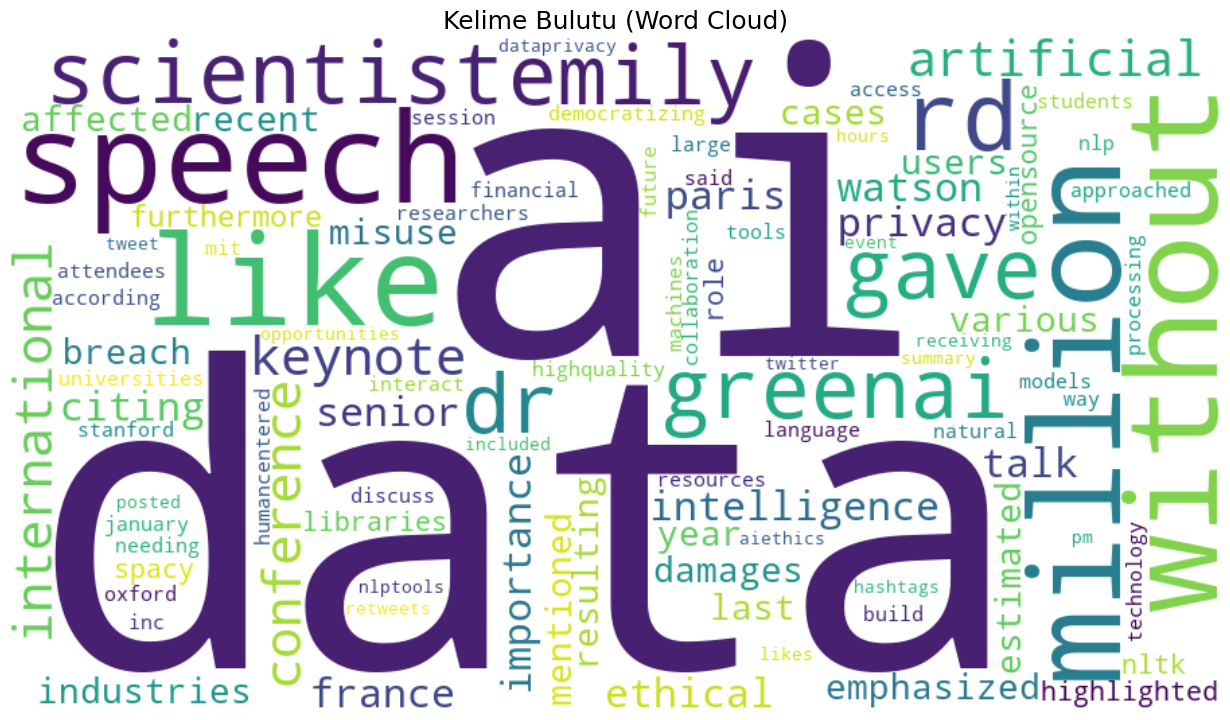

In [ ]:
# Word Cloud (Kelime Bulutu) görselleştirmesi
# Pastel tonlarda, profesyonel bir görünüm için özelleştirildi.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Pastel renk paleti tanımı
pastel_colors = [
    "#A3C1DA", "#F7CAC9", "#B5EAD7", "#FFDAC1", "#E2F0CB", "#C7CEEA",
    "#FFF1BA", "#B5EAD7", "#FFB7B2", "#FF9AA2", "#B5EAD7", "#C7CEEA"
]

def pastel_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    import random
    return random.choice(pastel_colors)

# WordCloud nesnesini oluşturuyoruz
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    max_words=100,
    min_font_size=14,
    color_func=pastel_color_func,
    prefer_horizontal=1.0,
    random_state=42,
    font_path=None # Türkçe karakterler için gerekirse font eklenebilir
).generate_from_frequencies(temp_words.to_dict())

# Görselleştirme
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kelime Bulutu (Word Cloud)', fontsize=20, color='#444444', pad=20)
plt.tight_layout(pad=0)
plt.show()

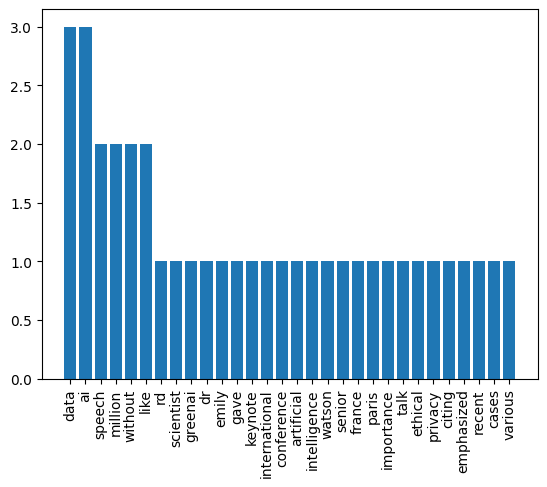

In [14]:
plt.bar(temp_words.index[:30], temp_words.values[:30])
plt.xticks(rotation=90)
plt.show()

## Tokenizasyon (Tokenization)

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Kelime bazında tokenleştirme.
tokens = word_tokenize(text)
print("Metindeki Token Sayısı: ",len(tokens))

Metindeki Token Sayısı:  123


## Lemmatizasyon

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

In [ ]:
print(lemmatized_tokens)
print(tokens)

['january', 'rd', 'dr', 'emily', 'watson', 'senior', 'data', 'scientist', 'greenai', 'inc', 'gave', 'keynote', 'speech', 'international', 'conference', 'artificial', 'intelligence', 'paris', 'france', 'talk', 'emphasized', 'importance', 'ethical', 'ai', 'data', 'privacy', 'citing', 'recent', 'case', 'misuse', 'various', 'industry', 'mentioned', 'million', 'user', 'affected', 'data', 'breach', 'last', 'year', 'resulting', 'damage', 'estimated', 'million', 'furthermore', 'highlighted', 'role', 'opensource', 'library', 'spacy', 'nltk', 'democratizing', 'access', 'natural', 'language', 'processing', 'tool', 'according', 'student', 'researcher', 'build', 'highquality', 'nlp', 'model', 'without', 'needing', 'large', 'financial', 'resource', 'ai', 'machine', 'said', 'interact', 'technology', 'humancentered', 'way', 'session', 'attendee', 'university', 'like', 'stanford', 'mit', 'oxford', 'approached', 'discus', 'future', 'collaboration', 'opportunity', 'pm', 'posted', 'summary', 'speech', 'tw

## Sözcük Türü Etiketleme (Part-of-Speech Tagging)

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')

post = nltk.pos_tag(tokens)
post


"""
CC bağlaç
JJ sıfat
NN isim
RB zarf
VB fiil
"""

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


' \nCC bağlaç\nJJ sıfat\nNN isim\nRB zarf\nVB fiil\n'

## Varlık Tanıma (Named Entity Recognition - NER)

In [ ]:
import spacy

# SpaCy'nin İngilizce modelini yüklüyoruz
nlp = spacy.load("en_core_web_sm")

# Metni analiz et
doc = nlp(text)

# Varlıkları (Entities) bul ve yazdır
print(f"{'Entity':<30} {'Label':<15} {'Explanation'}")
print("-" * 60)
for ent in doc.ents:
    print(f"{ent.text:<30} {ent.label_:<15} {spacy.explain(ent.label_)}")

Entity                         Label           Explanation
------------------------------------------------------------
january                        DATE            Absolute or relative dates or periods
scientist greenai inc          ORG             Companies, agencies, institutions, etc.
paris                          GPE             Countries, cities, states
france                         GPE             Countries, cities, states
million                        CARDINAL        Numerals that do not fall under another type
last year                      DATE            Absolute or relative dates or periods
damages estimated million      CARDINAL        Numerals that do not fall under another type
stanford mit                   ORG             Companies, agencies, institutions, etc.
oxford                         ORG             Companies, agencies, institutions, etc.
hours                          TIME            Times smaller than a day
john lee                       PERSON          